In [ ]:
import numpy as np
import pandas as pd

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

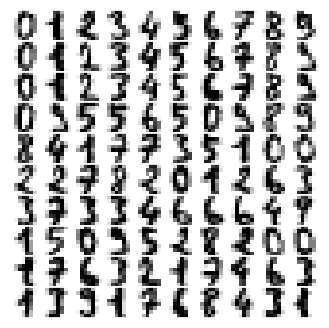

In [ ]:
def plot_digits(data):
  fig,ax = plt.subplots(10,10,figsize=(4,4),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0, wspace=0))
  for i,axi in enumerate(ax.flat):
    axi.imshow(data[i].reshape(8,8), cmap='binary')

plot_digits(digits.data)

In [ ]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
digits_trf = model.fit_transform(digits.data)
digits_trf

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


array([[165.5730437 ,  30.04675384],
       [-46.30594879,  48.27623057],
       [-97.10115637,  21.89382574],
       ...,
       [-49.94920887, -24.85038223],
       [ -1.3398207 , -71.51637741],
       [ -9.61500632, -36.82682674]])

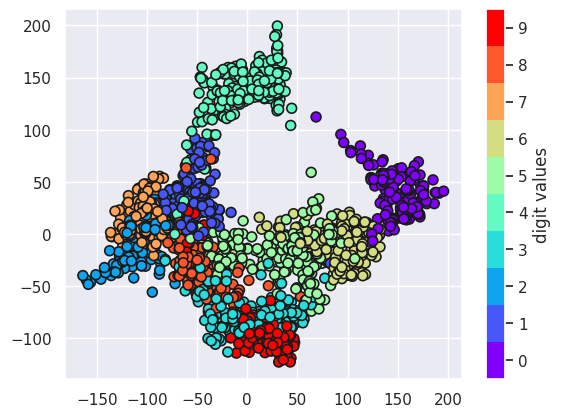

In [ ]:
plt.scatter(digits_trf[:,0], digits_trf[:,1], c=digits.target, s=50, ec='k', lw=1.2,
            cmap=mpl.colormaps['rainbow'].resampled(10))
plt.colorbar(ticks=np.arange(10), label='digit values')
plt.clim(-0.5, 9.5)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
digits_trf = pca.fit_transform(digits.data)
digits_trf.shape

(1797, 41)

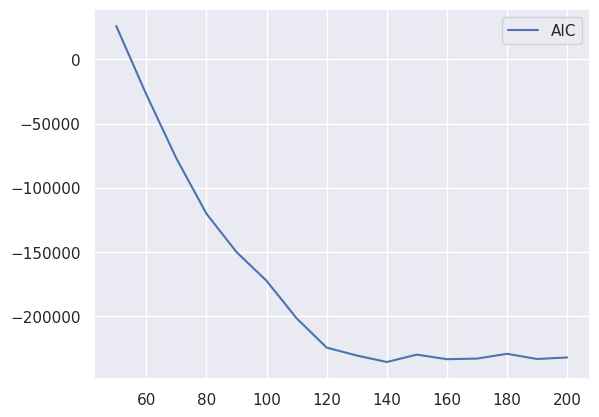

In [ ]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(50,210,10)
models = np.array([
    GaussianMixture(n_components=n, covariance_type='full', random_state=0).fit(digits_trf) \
    for n in n_components
])
plt.plot(n_components, [m.aic(digits_trf) for m in models], label='AIC')
plt.legend(loc='best')

In [ ]:
gmm = GaussianMixture(n_components=140, covariance_type='full', random_state=0)
labels = gmm.fit_predict(digits_trf)

In [ ]:
digits_new_c_trf  = gmm.sample(n_samples=100) # _c_ -> combined
digits_new_trf    = digits_new_c_trf[0]
labels_new_trf    = digits_new_c_trf[1]
digits_new_trf.shape, labels_new_trf.shape

((100, 41), (100,))

In [ ]:
digits_new_inv    = pca.inverse_transform(digits_new_trf)

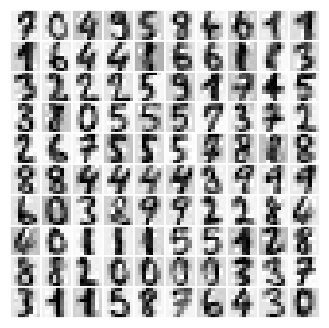

In [ ]:
plot_digits(digits_new_inv)

In [ ]:
labels_new_trf[:20]

array([ 1,  2,  3,  4,  5,  6,  7,  7,  8,  8,  8,  9, 10, 10, 11, 13, 13,
       17, 17, 18])